<a href="https://colab.research.google.com/github/ECV21/R-coding-challenges/blob/main/Data_cleaning_R_Titanic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data cleaning of dataset Titanic whit R

In [4]:
library(dplyr)
library(readr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [5]:
titanic_data <- read_csv("train.csv")

Rows: 891 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (5): Name, Sex, Ticket, Cabin, Embarked
dbl (7): PassengerId, Survived, Pclass, Age, SibSp, Parch, Fare

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


#Estructura del dataset

In [6]:
#Ver tipo de datos
str(titanic_data)

spc_tbl_ [891 × 12] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ PassengerId: num [1:891] 1 2 3 4 5 6 7 8 9 10 ...
 $ Survived   : num [1:891] 0 1 1 1 0 0 0 0 1 1 ...
 $ Pclass     : num [1:891] 3 1 3 1 3 3 1 3 3 2 ...
 $ Name       : chr [1:891] "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr [1:891] "male" "female" "female" "female" ...
 $ Age        : num [1:891] 22 38 26 35 35 NA 54 2 27 14 ...
 $ SibSp      : num [1:891] 1 1 0 1 0 0 0 3 0 1 ...
 $ Parch      : num [1:891] 0 0 0 0 0 0 0 1 2 0 ...
 $ Ticket     : chr [1:891] "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : num [1:891] 7.25 71.28 7.92 53.1 8.05 ...
 $ Cabin      : chr [1:891] NA "C85" NA "C123" ...
 $ Embarked   : chr [1:891] "S" "C" "S" "S" ...
 - attr(*, "spec")=
  .. cols(
  ..   PassengerId = col_double(),
  ..   Survived = col_double(),
  ..   Pclass = col_double(),


In [7]:
#Estadístico de la base de datos
summary(titanic_data)

  PassengerId       Survived          Pclass          Name          
 Min.   :  1.0   Min.   :0.0000   Min.   :1.000   Length:891        
 1st Qu.:223.5   1st Qu.:0.0000   1st Qu.:2.000   Class :character  
 Median :446.0   Median :0.0000   Median :3.000   Mode  :character  
 Mean   :446.0   Mean   :0.3838   Mean   :2.309                     
 3rd Qu.:668.5   3rd Qu.:1.0000   3rd Qu.:3.000                     
 Max.   :891.0   Max.   :1.0000   Max.   :3.000                     
                                                                    
     Sex                 Age            SibSp           Parch       
 Length:891         Min.   : 0.42   Min.   :0.000   Min.   :0.0000  
 Class :character   1st Qu.:20.12   1st Qu.:0.000   1st Qu.:0.0000  
 Mode  :character   Median :28.00   Median :0.000   Median :0.0000  
                    Mean   :29.70   Mean   :0.523   Mean   :0.3816  
                    3rd Qu.:38.00   3rd Qu.:1.000   3rd Qu.:0.0000  
                    Max.   :80.00 

In [8]:
#ver las primeras filas para confirmar que las columnas Name y PassengerId no están en nuestro dataset
head(titanic_data)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NA,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NA,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NA,S
6,0,3,"Moran, Mr. James",male,NA,0,0,330877,8.4583,NA,Q


In [9]:
#Ver solo nombre de las columnas
colnames(titanic_data)

[1] "PassengerId" "Survived"    "Pclass"      "Name"        "Sex"        
 [6] "Age"         "SibSp"       "Parch"       "Ticket"      "Fare"       
[11] "Cabin"       "Embarked"

#Data cleaning

In [10]:
#contar el núm de columnas nulls
null_counts <- colSums(is.na(titanic_data))
null_counts #ver columnas con sus respetivos nulls
null_counts>0

PassengerId    Survived      Pclass        Name         Sex         Age 
          0           0           0           0           0         177 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
          0           0           0           0         687           2

PassengerId    Survived      Pclass        Name         Sex         Age 
      FALSE       FALSE       FALSE       FALSE       FALSE        TRUE 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
      FALSE       FALSE       FALSE       FALSE        TRUE        TRUE

In [11]:
#Ver el % de valores nulls que tiene cada columna NUMERICA

null_percentage <- colSums(is.na(titanic_data)) / nrow(titanic_data) * 100
null_percentage

PassengerId    Survived      Pclass        Name         Sex         Age 
  0.0000000   0.0000000   0.0000000   0.0000000   0.0000000  19.8653199 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
  0.0000000   0.0000000   0.0000000   0.0000000  77.1043771   0.2244669

In [12]:
#Eliminar la columna; en este caso eliminaré la columna Cabin

titanic_data <- select(titanic_data, -c(Cabin ))
print(titanic_data)

# A tibble: 891 × 11
   PassengerId Survived Pclass Name         Sex     Age SibSp Parch Ticket  Fare
         <dbl>    <dbl>  <dbl> <chr>        <chr> <dbl> <dbl> <dbl> <chr>  <dbl>
 1           1        0      3 Braund, Mr.… male     22     1     0 A/5 2…  7.25
 2           2        1      1 Cumings, Mr… fema…    38     1     0 PC 17… 71.3 
 3           3        1      3 Heikkinen, … fema…    26     0     0 STON/…  7.92
 4           4        1      1 Futrelle, M… fema…    35     1     0 113803 53.1 
 5           5        0      3 Allen, Mr. … male     35     0     0 373450  8.05
 6           6        0      3 Moran, Mr. … male     NA     0     0 330877  8.46
 7           7        0      1 McCarthy, M… male     54     0     0 17463  51.9 
 8           8        0      3 Palsson, Ma… male      2     3     1 349909 21.1 
 9           9        1      3 Johnson, Mr… fema…    27     0     2 347742 11.1 
10          10        1      2 Nasser, Mrs… fema…    14     1     0 237736 30.1 
# ℹ 881

In [13]:
#Rellenar columna con AGE con el promedio:
selected_cols <- c("Age", "Embarked")
head(titanic_data[, selected_cols])

Age,Embarked
<dbl>,<chr>
22,S
38,C
26,S
35,S
35,S
NA,Q


In [14]:
#Rellenar con el PROMEDIO la columna AGe, esto debido a que tiene 177 valores null

#obtner la media de la columna AGE
age_mean <- mean(titanic_data$Age, na.rm =TRUE)

#Rellenar con el promedio anterior los datos faltantes de la columna AGE
titanic_data$Age[is.na(titanic_data$Age)] <- age_mean

#Verificar que datos faltantes esten rellenados
print(sum(is.na(titanic_data$Age))) #suma valores nulls debería ser CERO debido a que ya se rellenó con el primedio

[1] 0


In [15]:
selected_cols <- c("Age")
head(titanic_data[, selected_cols])

Age
<dbl>
22.00000
38.00000
26.00000
35.00000
35.00000
29.69912


In [16]:
##Rellenar la columna SEX y Embarked con la moda, debio a que son columas catégoricas y tienen nulls

#función para calcular moda
calculate_mode <- function(x) {
  uniqx <- unique(x)
  uniqx[which.max(tabulate(match(x, uniqx)))]
}


#Calcular la moda para las columnas con valores faltantes
moda_sex <- calculate_mode(titanic_data$Sex)
moda_embarked <- calculate_mode(titanic_data$Embarked)


#Rellenar los valores faltantes en las columnas con sus respectivas modas
titanic_data$Sex[is.na(titanic_data$Age)] <- moda_sex
titanic_data$Embarked[is.na(titanic_data$Embarked)] <- moda_embarked

#verificar que los valores faltantes haya sido rellenados
print(sum(is.na(titanic_data$Sex))) #debería ser CERO pues ya se rellenó
print(sum(is.na(titanic_data$Embarked))) #debería ser CERO pues ya se rellenó


[1] 0
[1] 0


In [19]:
#contar el núm de columnas nulls
null_counts <- colSums(is.na(titanic_data))
null_counts

PassengerId    Survived      Pclass        Name         Sex         Age 
          0           0           0           0           0           0 
      SibSp       Parch      Ticket        Fare    Embarked 
          0           0           0           0           0

In [20]:
#datos categóricos--->dummies

# Convertir variable Sex en dummies
sex_dummies <- model.matrix( ~ Sex -1, data=titanic_data)# -1 para evitar la columna de intercepto

#convertir variable Embarked en dummies
embarked_dummies <- model.matrix( ~ Embarked - 1, data = titanic_data)


#Añadir los dummies al dataset orginal
titanic_data <- cbind(titanic_data, sex_dummies)
titanic_data <- cbind(titanic_data, embarked_dummies)


#Eliminar la columna original categóricas en caso de que se requiera
titanic_data <- titanic_data[ , !names(titanic_data) %in% c ("Sex", "Embarked")]

#ver lo cambios
head(titanic_data)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sexfemale,Sexmale,EmbarkedC,EmbarkedQ,EmbarkedS
,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0,3,"Braund, Mr. Owen Harris",22.00000,1,0,A/5 21171,7.2500,0,1,0,0,1
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",38.00000,1,0,PC 17599,71.2833,1,0,1,0,0
3,3,1,3,"Heikkinen, Miss. Laina",26.00000,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.00000,1,0,113803,53.1000,1,0,0,0,1
5,5,0,3,"Allen, Mr. William Henry",35.00000,0,0,373450,8.0500,0,1,0,0,1
6,6,0,3,"Moran, Mr. James",29.69912,0,0,330877,8.4583,0,1,0,1,0


In [30]:
head(titanic_data[, "Sexmale"])

[1] 1 0 0 0 1 1

In [33]:
head(titanic_data)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sexfemale,Sexmale,EmbarkedC,EmbarkedQ,EmbarkedS
,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0,3,"Braund, Mr. Owen Harris",22.00000,1,0,A/5 21171,7.2500,0,1,0,0,1
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",38.00000,1,0,PC 17599,71.2833,1,0,1,0,0
3,3,1,3,"Heikkinen, Miss. Laina",26.00000,0,0,STON/O2. 3101282,7.9250,1,0,0,0,1
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.00000,1,0,113803,53.1000,1,0,0,0,1
5,5,0,3,"Allen, Mr. William Henry",35.00000,0,0,373450,8.0500,0,1,0,0,1
6,6,0,3,"Moran, Mr. James",29.69912,0,0,330877,8.4583,0,1,0,1,0


#Data visualization

In [34]:
#Carga de librería

library(dplyr)
library(ggplot2)

In [35]:
# Resumen estadístico de las variables numéricas
summary(titanic_data[, c("Age", "Fare")])

      Age             Fare       
 Min.   : 0.42   Min.   :  0.00  
 1st Qu.:22.00   1st Qu.:  7.91  
 Median :29.70   Median : 14.45  
 Mean   :29.70   Mean   : 32.20  
 3rd Qu.:35.00   3rd Qu.: 31.00  
 Max.   :80.00   Max.   :512.33  

In [37]:
# Resumen de las variables categóricas
table(titanic_data$Survived)
table(titanic_data$Pclass)
table(titanic_data$Sex)
table(titanic_data$Embarked)


  0   1 
549 342 


  1   2   3 
216 184 491 

< table of extent 0 >

< table of extent 0 >

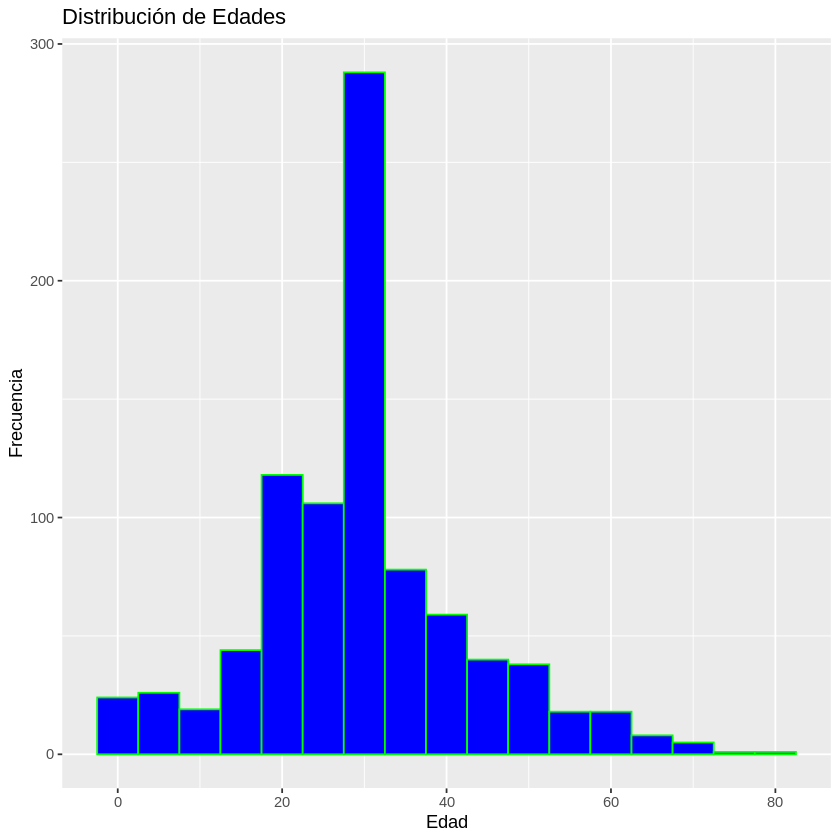

In [39]:
# Histograma de la edad
ggplot(titanic_data, aes(x = Age)) +
  geom_histogram(binwidth = 5, fill = "blue", color = "green") +
  labs(title = "Distribución de Edades", x = "Edad", y = "Frecuencia")

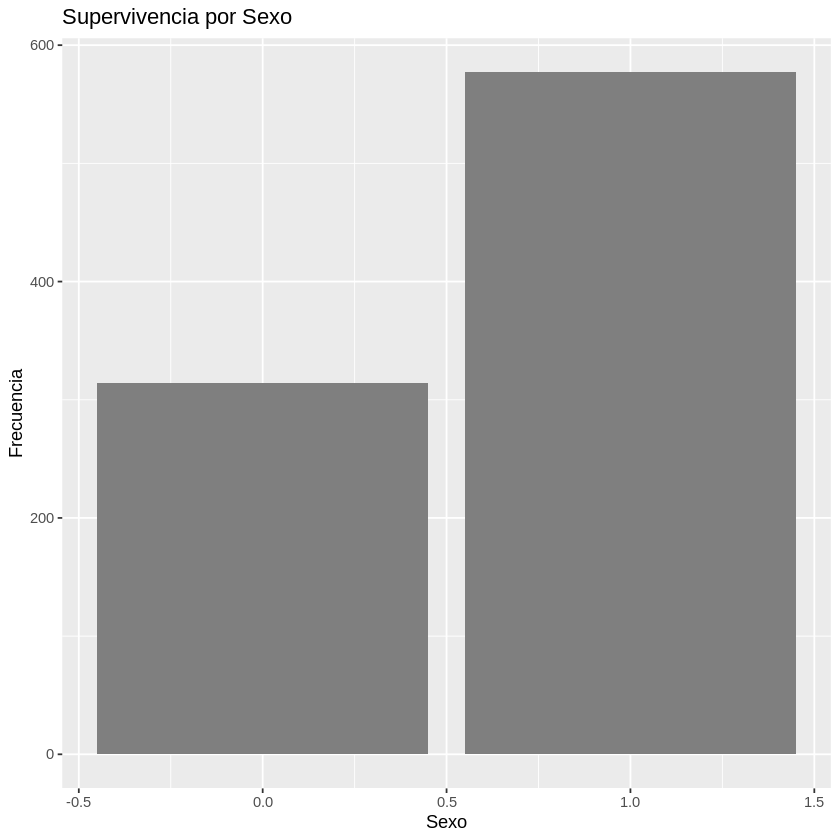

In [43]:
# Gráfico de barras de la supervivencia por sexo
ggplot(titanic_data, aes(x = Sexmale, fill = factor(Survived))) +
  geom_bar() +
  labs(title = "Supervivencia por Sexo", x = "Sexo", y = "Frecuencia") +
  scale_fill_manual(values = c("died" = "red", "survived" = "green"))

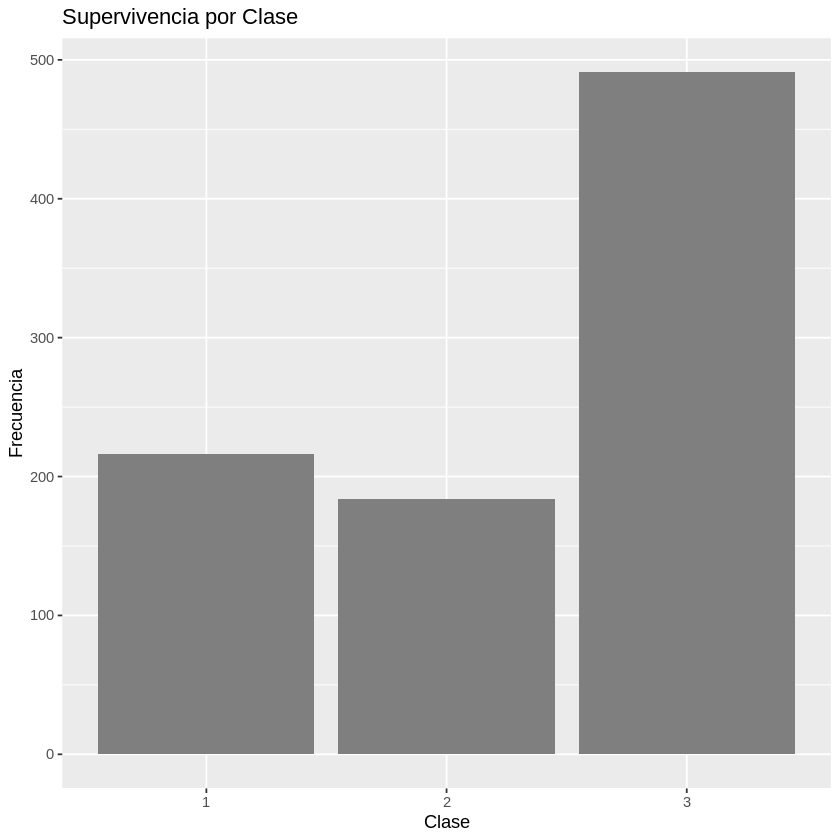

In [44]:
# Gráfico de barras de la supervivencia por clase
ggplot(titanic_data, aes(x = factor(Pclass), fill = factor(Survived))) +
  geom_bar() +
  labs(title = "Supervivencia por Clase", x = "Clase", y = "Frecuencia") +
  scale_fill_manual(values = c("died" = "red", "survived" = "green"))

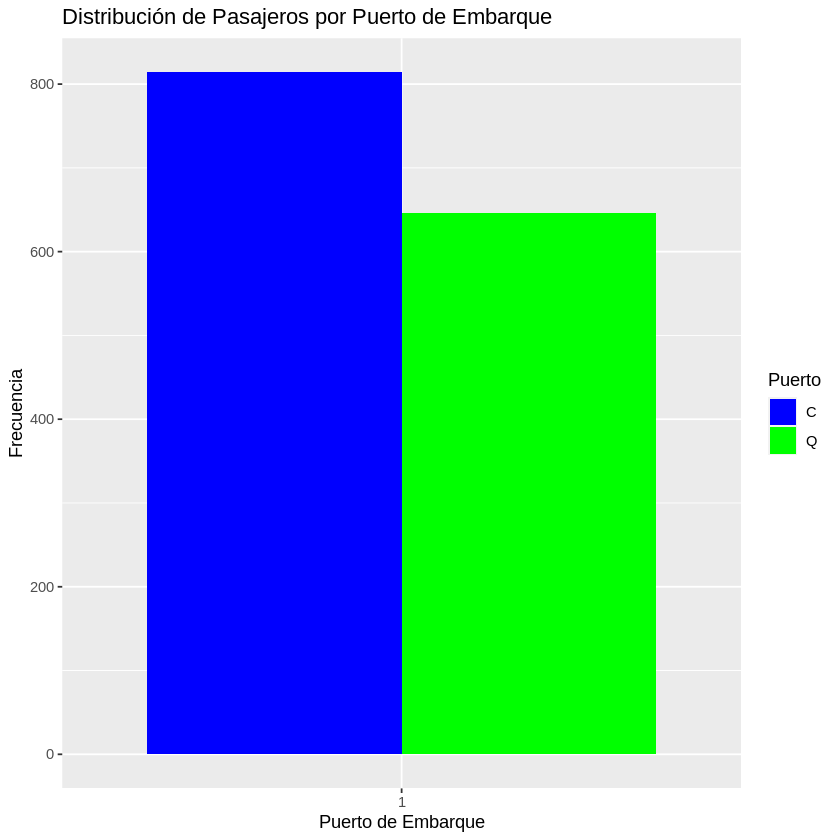

In [46]:
# Gráfico de barras de la supervivencia por puerto de embarque
ggplot(titanic_data, aes(x = factor(1))) +
  geom_bar(aes(fill = factor(EmbarkedC)), position = "dodge") +
  geom_bar(aes(fill = factor(EmbarkedQ)), position = "dodge") +
  geom_bar(aes(fill = factor(EmbarkedS)), position = "dodge") +
  labs(title = "Distribución de Pasajeros por Puerto de Embarque", x = "Puerto de Embarque", y = "Frecuencia") +
  scale_fill_manual(values = c("blue", "green", "red"), name = "Puerto", labels = c("C", "Q", "S"))